<a href="https://colab.research.google.com/github/mpartain1/sales-predictions/blob/main/Copy_of_BeltExam2MarcusPartain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

set_config(display='diagram')

In [ ]:
df = pd.read_csv('/content/Belt2_A_drugtype_v2_final.csv')
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [ ]:
df['Cholesterol'].value_counts()
df['Cholesterol'] = df['Cholesterol'].replace('high', 'HIGH')
df['Cholesterol'] = df['Cholesterol'].replace('norm', 'NORMAL')
df['Cholesterol'] = df['Cholesterol'].replace('NORM', 'NORMAL')
df['Cholesterol'].value_counts()

HIGH      164
NORMAL    132
Name: Cholesterol, dtype: int64

In [ ]:
df['Gender'].value_counts()
df['Gender'] = df['Gender'].replace('male', 'M')
df['Gender'] = df['Gender'].replace('Male', 'M')
df['Gender'] = df['Gender'].replace('female', 'F')
df['Gender'] = df['Gender'].replace('Female', 'F')
df['Gender'] = df['Gender'].replace('femal', 'F')
df['Gender'] = df['Gender'].replace('Femal', 'F')
df['Gender'].value_counts()

M    154
F    142
Name: Gender, dtype: int64

In [ ]:
df['BP'].value_counts()

High      142
Normal     46
Low        33
Name: BP, dtype: int64

In [ ]:
df['Drug'].value_counts()

drugQ    148
drugZ    148
Name: Drug, dtype: int64

In [ ]:
#Used Geeks for Geeks website and Stack Overflow on this part
df.drop(df.index[(df.Age > 110)], inplace = True)
df.drop(df.index[(df.Age < 0)], inplace = True)

In [ ]:
df['Na_to_K'] = pd.to_numeric(df['Na_to_K'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          236 non-null    float64
 1   Gender       295 non-null    object 
 2   BP           220 non-null    object 
 3   Cholesterol  295 non-null    object 
 4   Na_to_K      294 non-null    float64
 5   Drug         295 non-null    object 
dtypes: float64(2), object(4)
memory usage: 24.2+ KB


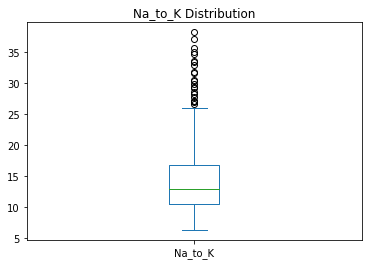

In [ ]:
df['Na_to_K'].plot(kind='box', title='Na_to_K Distribution')
plt.show()
#There are some outliers, but for the most part the data isn't too skewed.

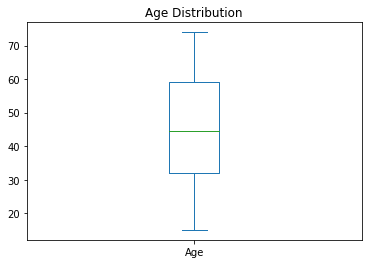

In [ ]:
df['Age'].plot(kind='box', title='Age Distribution')
plt.show()
#This data is not too skewed either.  As a result, we will impute missing values using
#the mean rather than the median since in unskewed distributions, the mean is more effective
#at reflecting the true center of the data.

In [ ]:
y = df['Drug']
X = df.drop(columns=['Drug'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.isna().any()

Age             True
Gender         False
BP              True
Cholesterol    False
Na_to_K         True
dtype: bool

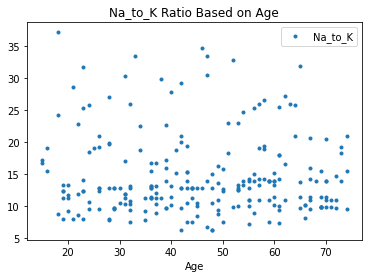

In [ ]:
df.plot(x='Age', y='Na_to_K', style='.', title='Na_to_K Ratio Based on Age')
#Here we see if the Sodium to Potassium Ratio varies based on age.  From the scatterplot,
#it appears that this ratio remains around the same as age increases.

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
med_imputer = SimpleImputer(strategy = 'median')
one_hot_encoder = OneHotEncoder(sparse = True)
logreg = LogisticRegression()
scaler = StandardScaler()
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ordinal_encoder)

In [ ]:
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor
#I used SimpleImputer to avoid data leakage, and imputed mean values because based on the 
#boxplots above (visualization #1), we see that the data is unskewed with not too many outliers.
#In this type of distribution, the mean is more representative of the central value 
#rather than the median.  I used a frequent_imputer for the BP column since a large majority
#of the values in this column were 'High'.  I concluded therefore that it was safe to impute
#missing values in the BP column as 'High' as well.  I used an ordinal encoder for the BP
#column because the categorical values were ordered from 'Low', 'Normal', 'High'.  Similarly,
#for the Cholesterol column, I used ordinal encoder with HIGH and NORMAL, and filled in
#missing values with the most frequent because HIGH occurred more than NORMAL, a majority
#of the time.  

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f971c40fe50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f971c40ffd0>)])

In [ ]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_processed, y_train)
ylog1 = logreg.predict(X_test_processed)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_processed, y_train)
yknn1 = knn.predict(X_test_processed)

{0.0001: 0.4594594594594595,
 0.001: 0.4594594594594595,
 0.01: 0.4594594594594595,
 0.1: 0.6756756756756757,
 1: 0.7972972972972973,
 10: 0.7972972972972973,
 100: 0.7972972972972973,
 1000: 0.7972972972972973}

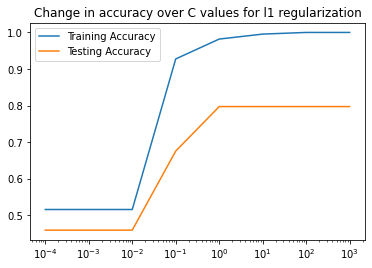

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [ ]:
log_reg_best = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l1')
log_reg_best_pipe = make_pipeline(scaler, log_reg_best)
log_reg_best_pipe.fit(X_train_processed, y_train)
log_df1 = log_reg_best_pipe.predict(X_test_processed)

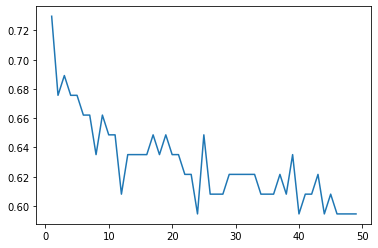

Best K value is 1 
with 0.7297297297297297 accuracy on the test set


In [ ]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train_processed, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test_processed))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_processed, y_train)
yknn2 = knn.predict(X_test_processed)

In [ ]:
print(f"Untuned Logistic Accuracy: {accuracy_score(y_test, ylog1)}")
print(f"Tuned Logistic Accuracy: {accuracy_score(y_test, log_df1)}")

Untuned Logistic Accuracy: 0.7702702702702703
Tuned Logistic Accuracy: 0.6756756756756757


In [ ]:


print(f"Untuned KNN Accuracy: {accuracy_score(y_test, yknn1)}")



print(f"Tuned KNN Accuracy: {accuracy_score(y_test, yknn2)}")

Untuned KNN Accuracy: 0.7567567567567568
Tuned KNN Accuracy: 0.7837837837837838


In [ ]:
#My final chosen model is KNN because it has better accuracy when tuned than the logistic model.